In [99]:
# Copyright (c) 2022.
# Realizado por: Arias-Chalá-Palacios
# All rights reserved.
%matpotlib inline 
from fastai.vision.data import verify_images
from fastai.vision.learner import cnn_learner
import os
bs = 24
sz = 128
PATH = './Osos/'
classes = []
for a in os.listdir(PATH):
    if os.path.isdir(os.path.join(PATH,a)) and not a.startswith('.'):
        classes.append(a)
print("Hay", len(classes), "clases:\n", classes)

for c in classes:
    print("Class: ",c)
    verify_images(os.path.join(PATH), delete=True)

Hay 6 clases:
 ['Oso de Anteojos', 'Oso Malayo', 'Oso Panda', 'Oso Pardo', 'Oso Perezoso', 'Oso Polar']
Class:  Oso de Anteojos
Class:  Oso Malayo
Class:  Oso Panda
Class:  Oso Pardo
Class:  Oso Perezoso
Class:  Oso Polar


In [110]:
from fastai.vision.data import ImageDataBunch, get_transforms, imagenet_stats
data = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=sz, bs=bs, valid=0.2).normalize(imagenet_stats)

In [70]:
print ("Hay", len(data.train_ds), 
        "imagenes de entrenamiento y ", len(data.valid_ds),
        "imagenes de validacion." )

Hay 24 imagenes de entrenamiento y  6 imagenes de validacion.


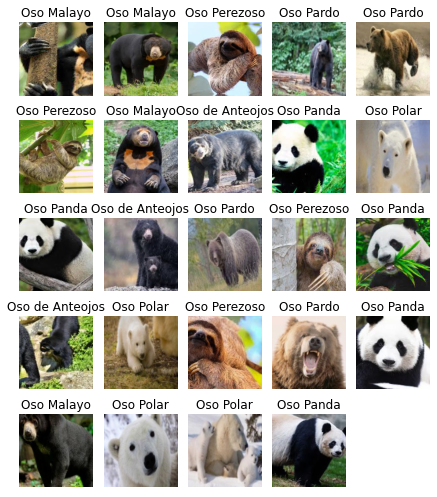

In [101]:
data.show_batch(rows=20, figsize=(6,7))

In [111]:
from fastai.vision.learner import cnn_learner
from fastai.vision import *
from fastai.metrics import accuracy
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


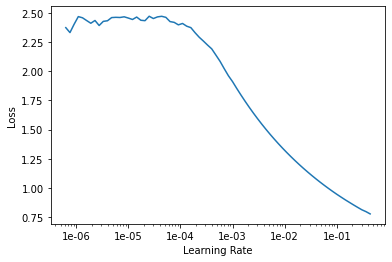

In [29]:
learn.lr_find()
learn.recorder.plot()

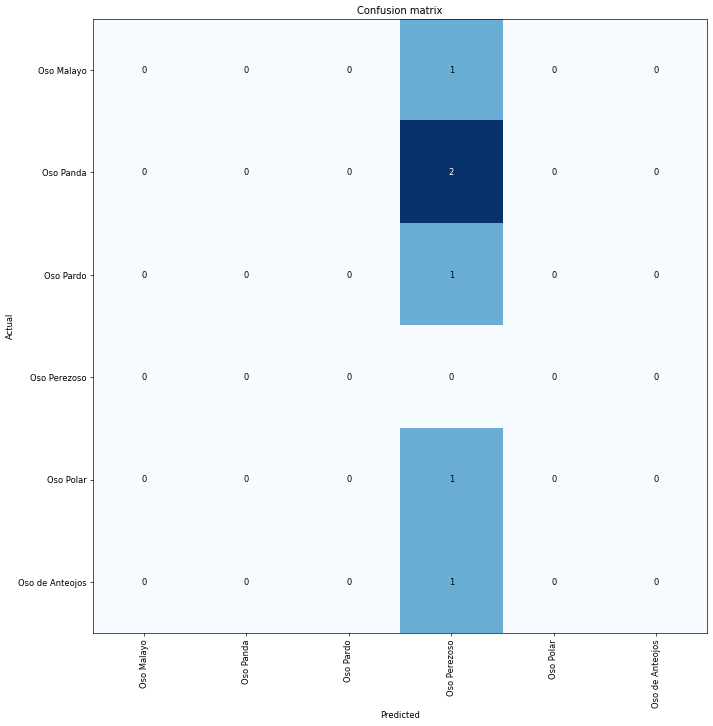

In [112]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

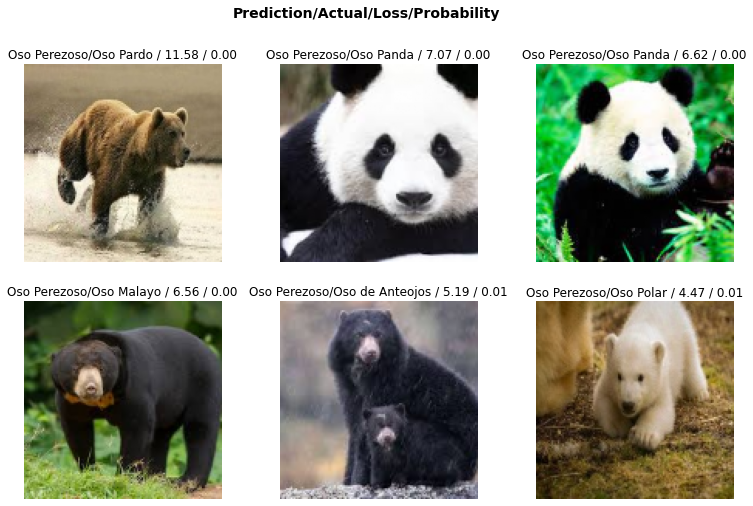

In [113]:
interp.plot_top_losses(6, figsize=(13,8), heatmap=False)

In [116]:
learn.unfreeze()
learn.fit_one_cycle(10, 1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.008861,0.832325,0.666667,00:58
1,0.011534,0.608107,0.833333,01:01
2,0.049437,0.456342,0.833333,01:02
3,0.040450,0.402088,0.833333,01:03
4,0.038155,0.371014,0.833333,01:02
5,0.033245,0.349075,0.833333,01:03
6,0.028825,0.350611,1.000000,01:02
7,0.036944,0.328186,1.000000,01:02
8,0.045015,0.322272,1.000000,01:02
9,0.040415,0.303761,1.000000,01:00


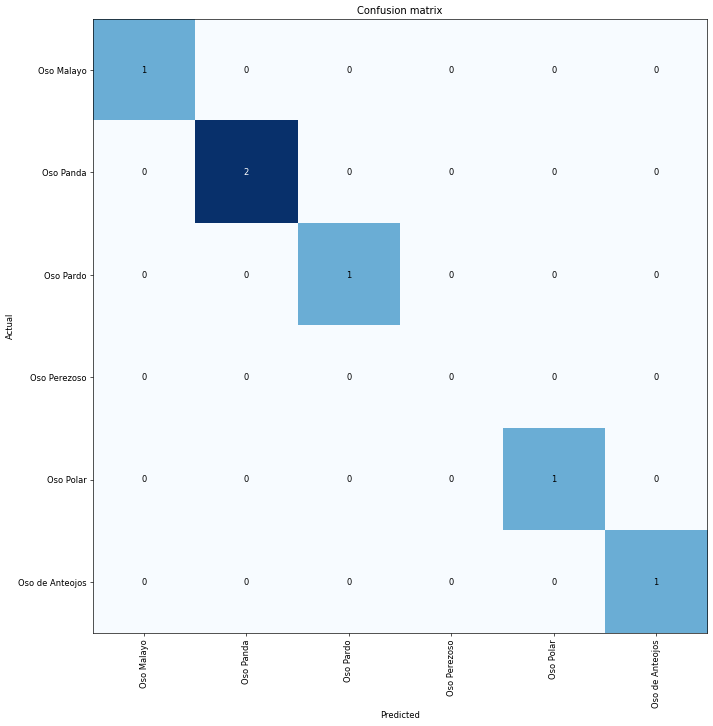

In [117]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

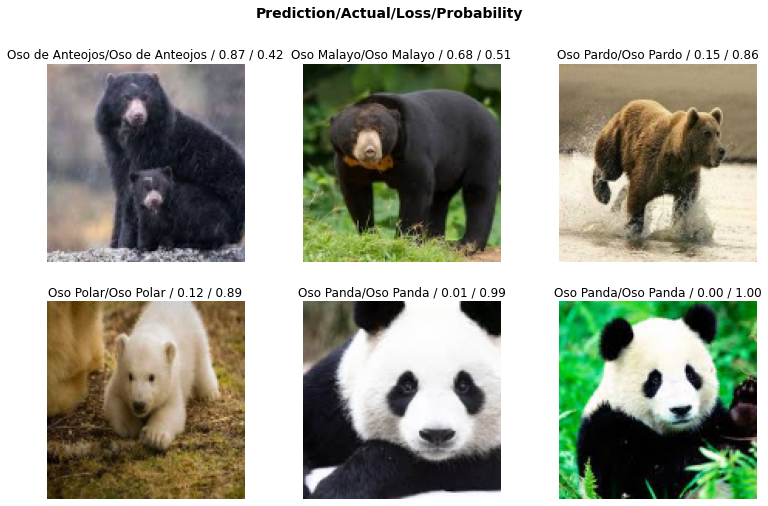

In [118]:
interp.plot_top_losses(6, figsize=(13,8), heatmap=False)